In [ ]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Phenology

## Model

In [ ]:
def load_and_prepare_data(year):
    """Generate and prepare synthetic data for training and testing"""
    # Generate synthetic data
    file_path = "/content/drive/MyDrive/Lab/BNN/Data/PBCNN/phenology/corn_input_final.csv"  # Change this to your file path
    df = pd.read_csv(file_path)
    df = df.dropna()

    # Specify the test and validation years
    test_years = [year]
    val_years = [year]

    # Create data splits
    test_df = df[df['year'].isin(test_years)]
    val_df = df[df['year'].isin(val_years)]
    train_df = df[(df['year'] < val_years[0]) & (~df['year'].isin(val_years + test_years))]

    # Assuming the last column is the target variable
    X_train = train_df.iloc[:, 3:-1].values.astype(np.float32)
    X_test = test_df.iloc[:, 3:-1].values.astype(np.float32)
    X_val = val_df.iloc[:, 3:-1].values.astype(np.float32)
    y_train = train_df.iloc[:, -1].values.astype(np.float32)
    y_test = test_df.iloc[:, -1].values.astype(np.float32)
    y_val = val_df.iloc[:, -1].values.astype(np.float32)

    # Normalize
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)  # Fit only on training data
    X_test = scaler.transform(X_test)        # Use the same transformation
    X_val = scaler.transform(X_val)

    # Reshape y_train and y_val to have shape (number of samples, 1)
    y_train = y_train.reshape(-1, 1)
    y_val = y_val.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    print(X_train.shape)
    print(y_train.shape)

    return X_train, X_test, y_train, y_test, test_df

def create_cnn_model(input_shape):
    """Creates a 1D CNN model for regression."""
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(units=1))  # Output layer for regression

    model.compile(loss='mean_squared_error', optimizer='adam')  # Use appropriate loss and optimizer
    return model

# Create an empty list to store data for all years
all_data = []

for year in range(2019, 2023 + 1):
    # Load and prepare data for the current year
    X_train, X_test, y_train, y_test, test_df = load_and_prepare_data(year)

    # Reshape input data for CNN
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Create and train the CNN model
    model = create_cnn_model(input_shape=(X_train.shape[1], X_train.shape[2]))
    model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)  # Adjust epochs and batch_size

    # Predict on test set
    y_test_pred = model.predict(X_test)

    # Store ground truth, predictions, and GEOID (if available) for the current year
    year_data = pd.DataFrame({'Year': [year] * len(y_test),
                              'GEOID': test_df['GEOID'].values if 'GEOID' in test_df else [None] * len(y_test),
                              'GroundTruth': y_test.ravel(),
                              'Predictions': y_test_pred.ravel()})
    all_data.append(year_data)

# Concatenate data for all years into a single DataFrame
all_data_df = pd.concat(all_data, ignore_index=True)

# Save the DataFrame to a CSV file
all_data_df.to_csv('/content/drive/MyDrive/Lab/BNN/Data/PBCNN/phenology/CNN_predictions_phe.csv', index=False)
print("Predictions saved to: /content/drive/MyDrive/Lab/BNN/Data/PBCNN/phenology/CNN_predictions_phe.csv")

(7774, 1123)
(7774, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
(8261, 1123)
(8261, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
(8750, 1123)
(8750, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
(9188, 1123)
(9188, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
(9628, 1123)
(9628, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predictions saved to: /content/drive/MyDrive/Lab/BNN/Data/PBCNN/phenology/CNN_predictions_phe.csv


## Plot

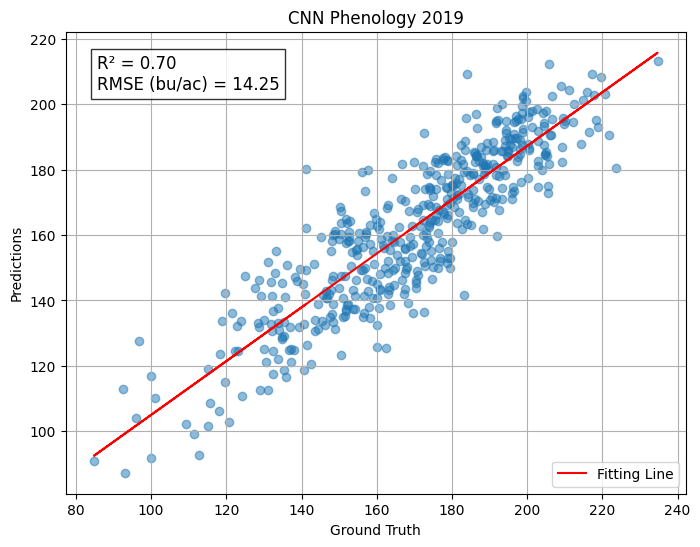

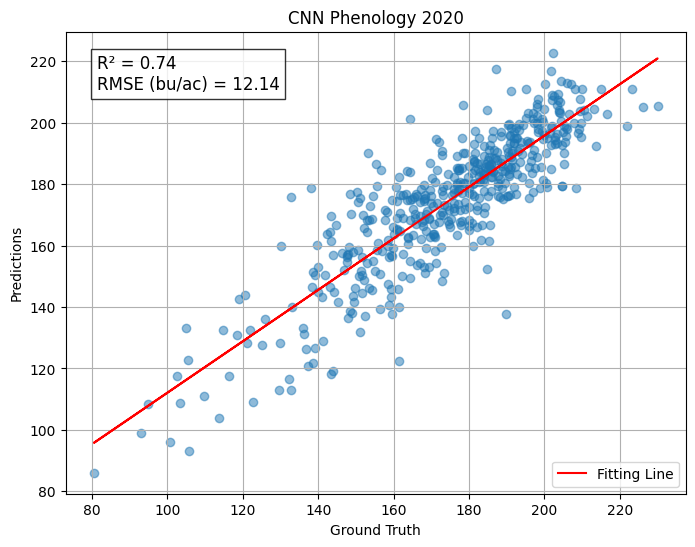

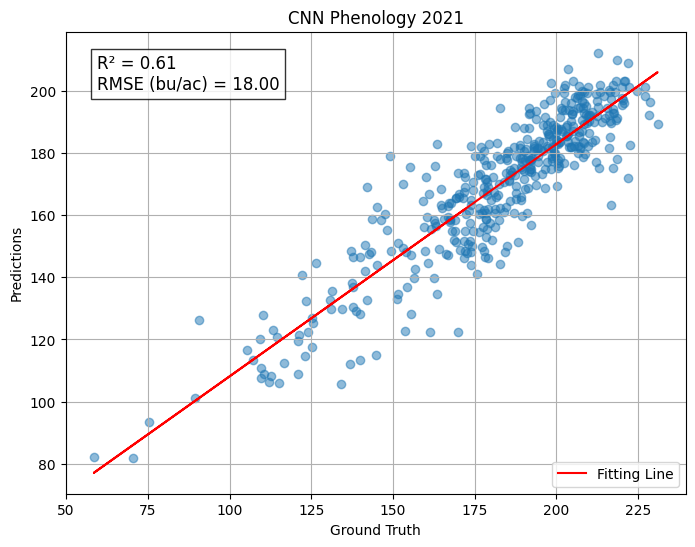

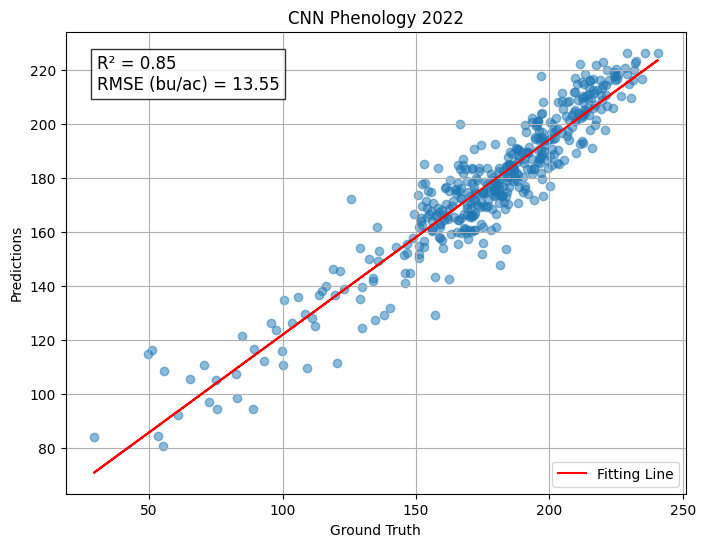

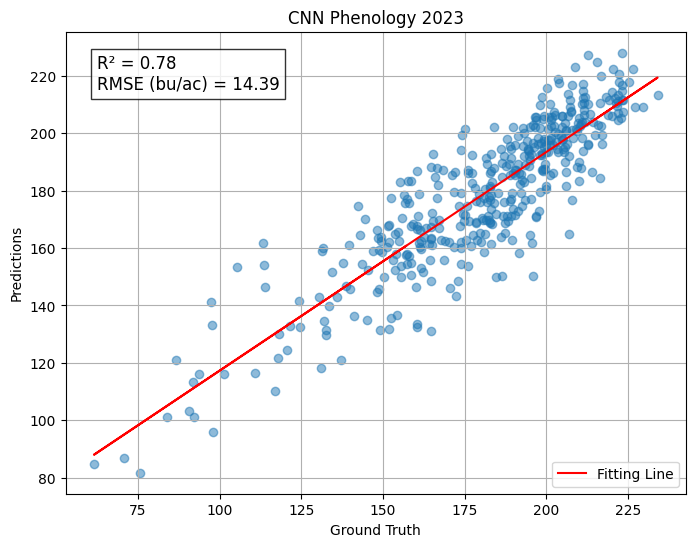

In [ ]:
# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/Lab/BNN/Data/PBCNN/phenology/CNN_predictions_phe.csv')

# Create scatter plots for each year
for year in data['Year'].unique():
    year_data = data[data['Year'] == year]
    plt.figure(figsize=(8, 6))
    plt.scatter(year_data['GroundTruth'], year_data['Predictions'], alpha=0.5)
    plt.xlabel("Ground Truth")
    plt.ylabel("Predictions")
    plt.title(f"CNN Phenology {year}")
    plt.grid(True)

    # Add fitting line
    m, b = np.polyfit(year_data['GroundTruth'], year_data['Predictions'], 1)  # Fit a line
    plt.plot(year_data['GroundTruth'], m * year_data['GroundTruth'] + b, color='red', label='Fitting Line')

    # Calculate R-squared and RMSE
    test_r2 = r2_score(year_data['GroundTruth'], year_data['Predictions'])
    test_rmse = np.sqrt(mean_squared_error(year_data['GroundTruth'], year_data['Predictions']))

    # Add R-squared and RMSE to the plot
    textstr = f'R² = {test_r2:.2f}\nRMSE (bu/ac) = {test_rmse:.2f}'
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

    plt.legend()  # Show legend for the fitting line
    plt.show()

# 16 days

## Model

In [ ]:
def load_and_prepare_data(year):
    """Generate and prepare synthetic data for training and testing"""
    # Generate synthetic data
    file_path = "/content/drive/MyDrive/Lab/BNN/Data/PBCNN/16days/corn_input_final.csv"  # Change this to your file path
    df = pd.read_csv(file_path)
    df = df.dropna()

    # Specify the test and validation years
    test_years = [year]
    val_years = [year]

    # Create data splits
    test_df = df[df['year'].isin(test_years)]
    val_df = df[df['year'].isin(val_years)]
    train_df = df[(df['year'] < val_years[0]) & (~df['year'].isin(val_years + test_years))]

    # Assuming the last column is the target variable
    X_train = train_df.iloc[:, 3:-1].values.astype(np.float32)
    X_test = test_df.iloc[:, 3:-1].values.astype(np.float32)
    X_val = val_df.iloc[:, 3:-1].values.astype(np.float32)
    y_train = train_df.iloc[:, -1].values.astype(np.float32)
    y_test = test_df.iloc[:, -1].values.astype(np.float32)
    y_val = val_df.iloc[:, -1].values.astype(np.float32)

    # Normalize
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)  # Fit only on training data
    X_test = scaler.transform(X_test)        # Use the same transformation
    X_val = scaler.transform(X_val)

    # Reshape y_train and y_val to have shape (number of samples, 1)
    y_train = y_train.reshape(-1, 1)
    y_val = y_val.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    print(X_train.shape)
    print(y_train.shape)

    return X_train, X_test, y_train, y_test, test_df

def create_cnn_model(input_shape):
    """Creates a 1D CNN model for regression."""
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(units=1))  # Output layer for regression

    model.compile(loss='mean_squared_error', optimizer='adam')  # Use appropriate loss and optimizer
    return model

# Create an empty list to store data for all years
all_data = []

for year in range(2019, 2023 + 1):
    # Load and prepare data for the current year
    X_train, X_test, y_train, y_test, test_df = load_and_prepare_data(year)

    # Reshape input data for CNN
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Create and train the CNN model
    model = create_cnn_model(input_shape=(X_train.shape[1], X_train.shape[2]))
    model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)  # Adjust epochs and batch_size

    # Predict on test set
    y_test_pred = model.predict(X_test)

    # Store ground truth, predictions, and GEOID (if available) for the current year
    year_data = pd.DataFrame({'Year': [year] * len(y_test),
                              'GEOID': test_df['GEOID'].values if 'GEOID' in test_df else [None] * len(y_test),
                              'GroundTruth': y_test.ravel(),
                              'Predictions': y_test_pred.ravel()})
    all_data.append(year_data)

# Concatenate data for all years into a single DataFrame
all_data_df = pd.concat(all_data, ignore_index=True)

# Save the DataFrame to a CSV file
all_data_df.to_csv('/content/drive/MyDrive/Lab/BNN/Data/PBCNN/16days/CNN_predictions_phe.csv', index=False)
print("Predictions saved to: /content/drive/MyDrive/Lab/BNN/Data/PBCNN/16days/CNN_predictions_phe.csv")

(7722, 375)
(7722, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
(8206, 375)
(8206, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
(8680, 375)
(8680, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
(9115, 375)
(9115, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
(9555, 375)
(9555, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predictions saved to: /content/drive/MyDrive/Lab/BNN/Data/PBCNN/16days/CNN_predictions_phe.csv


# Plot

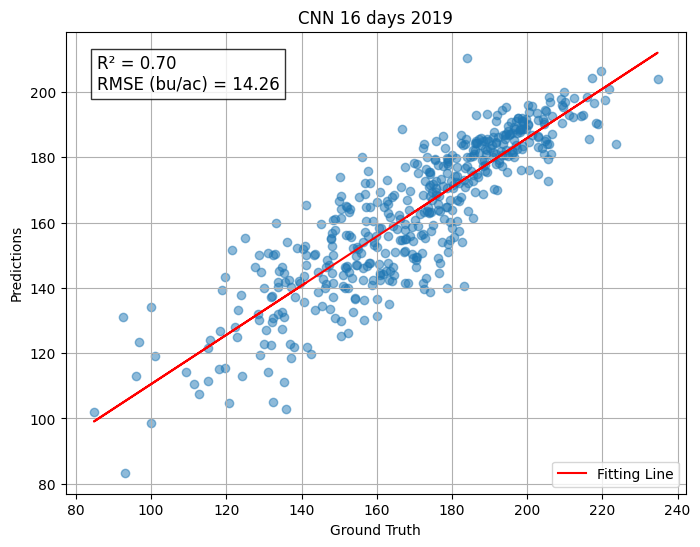

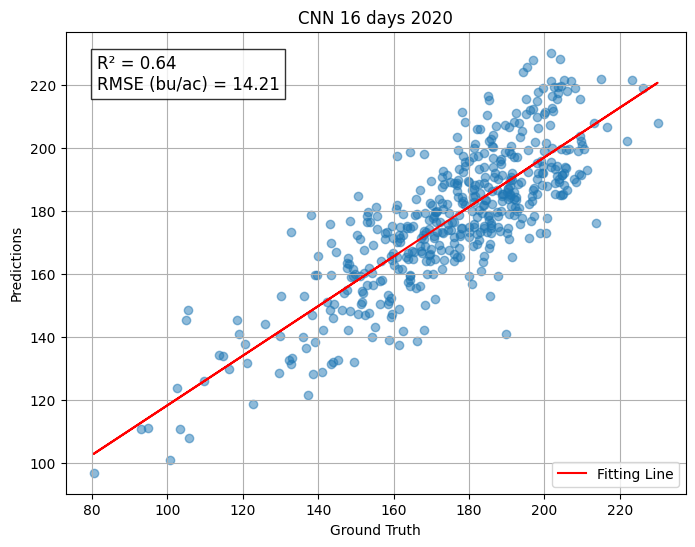

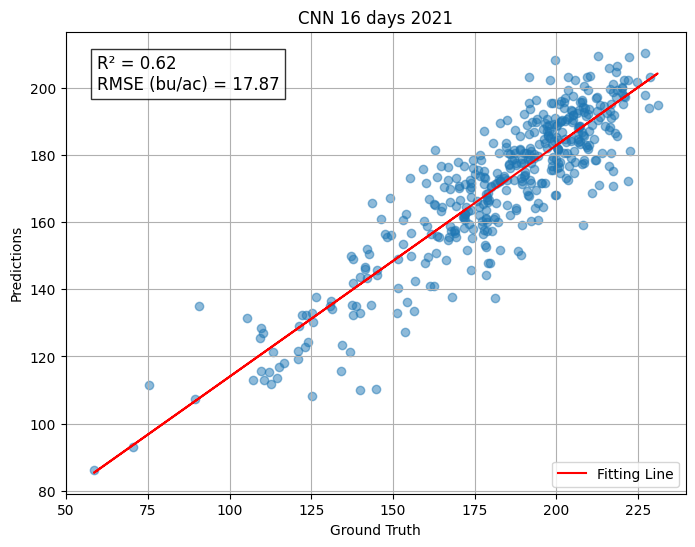

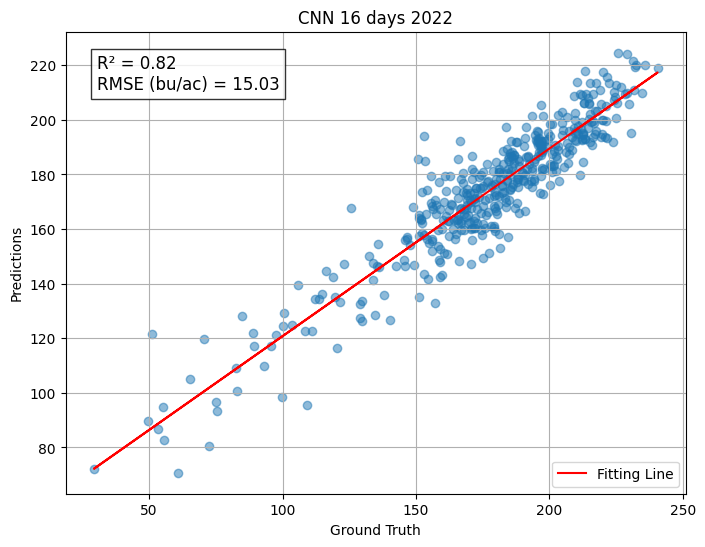

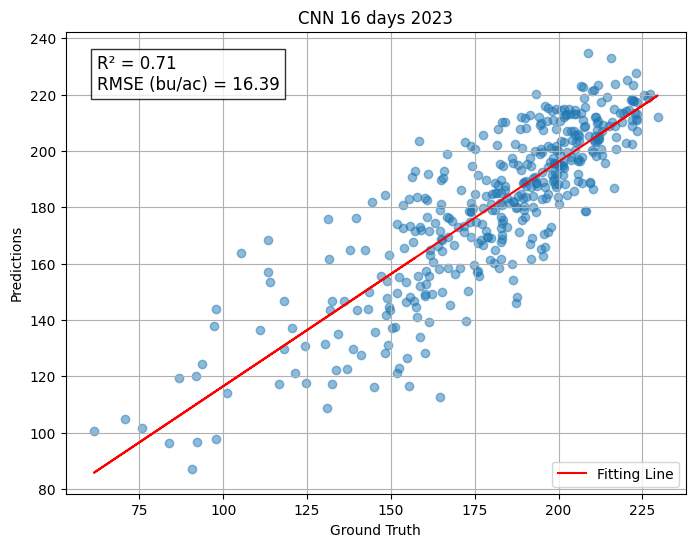

In [ ]:
# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/Lab/BNN/Data/PBCNN/16days/CNN_predictions_phe.csv')

# Create scatter plots for each year
for year in data['Year'].unique():
    year_data = data[data['Year'] == year]
    plt.figure(figsize=(8, 6))
    plt.scatter(year_data['GroundTruth'], year_data['Predictions'], alpha=0.5)
    plt.xlabel("Ground Truth")
    plt.ylabel("Predictions")
    plt.title(f"CNN 16 days {year}")
    plt.grid(True)

    # Add fitting line
    m, b = np.polyfit(year_data['GroundTruth'], year_data['Predictions'], 1)  # Fit a line
    plt.plot(year_data['GroundTruth'], m * year_data['GroundTruth'] + b, color='red', label='Fitting Line')

    # Calculate R-squared and RMSE
    test_r2 = r2_score(year_data['GroundTruth'], year_data['Predictions'])
    test_rmse = np.sqrt(mean_squared_error(year_data['GroundTruth'], year_data['Predictions']))

    # Add R-squared and RMSE to the plot
    textstr = f'R² = {test_r2:.2f}\nRMSE (bu/ac) = {test_rmse:.2f}'
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

    plt.legend()  # Show legend for the fitting line
    plt.show()